In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#tf.disable_v2_behavior()

%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Loading data

In [3]:
DATA_ROOT = "asl_alphabet_train/"
batch_size = 32
img_height = 90
img_width = 90
seed = 3126
validation_split = 0.2
AUTOTUNE = tf.data.AUTOTUNE

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(DATA_ROOT,
                                                       validation_split=validation_split*2,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size,
                                                       subset="training",
                                                       seed=seed)

val_test_ds = tf.keras.utils.image_dataset_from_directory(DATA_ROOT,
                                                       validation_split=validation_split*2,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size,
                                                       subset="validation",
                                                       seed=seed)

val_ds,test_ds = tf.keras.utils.split_dataset(val_test_ds,left_size=0.5)



Found 87000 files belonging to 29 classes.
Using 52200 files for training.
Found 87000 files belonging to 29 classes.
Using 34800 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


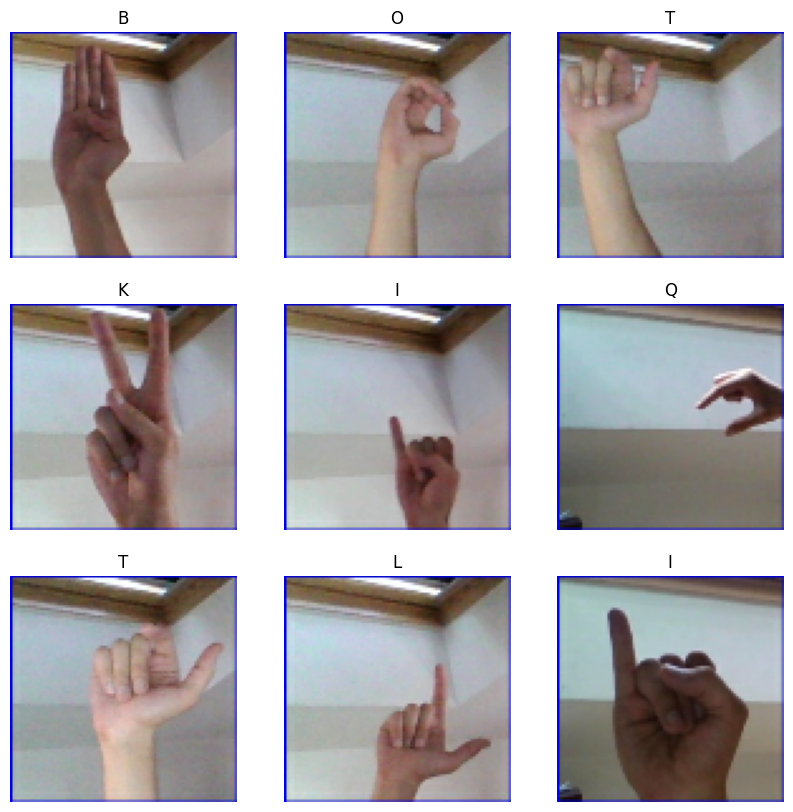

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [9]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [10]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
1632/1632 [==============================] - 27s 8ms/step - loss: 0.9616 - accuracy: 0.7095 - val_loss: 0.2203 - val_accuracy: 0.9280
Epoch 2/3
1632/1632 [==============================] - 25s 15ms/step - loss: 0.1296 - accuracy: 0.9580 - val_loss: 0.1331 - val_accuracy: 0.9572
Epoch 3/3
1632/1632 [==============================] - 8s 5ms/step - loss: 0.0760 - accuracy: 0.9762 - val_loss: 0.0726 - val_accuracy: 0.9745


In [11]:
res = model.evaluate(test_ds)
print("test loss, test acc:", res)

544/544 [==============================] - 2s 3ms/step - loss: 0.0714 - accuracy: 0.9764
test loss, test acc: [0.07140462845563889, 0.9763793349266052]
